Iris Flower Classification

This notebook uses classic machine learning classifiers to identify Iris flower species based on sepal and petal features. It compares Decision Tree, SVM, KNN and Naive Bayes  performance on the well-known Iris dataset.

Includes scaled and unscaled data handling, classification reports, and heatmaps for model performance.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [3]:
iris = load_iris()
X = iris.data[:, :4] 
y = iris.target

In [4]:
#X variables
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#Y variable :  Sentosa-0 ,Versicolor-1 ,Virginica-2
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
#Y variable values
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.data.shape

(150, 4)

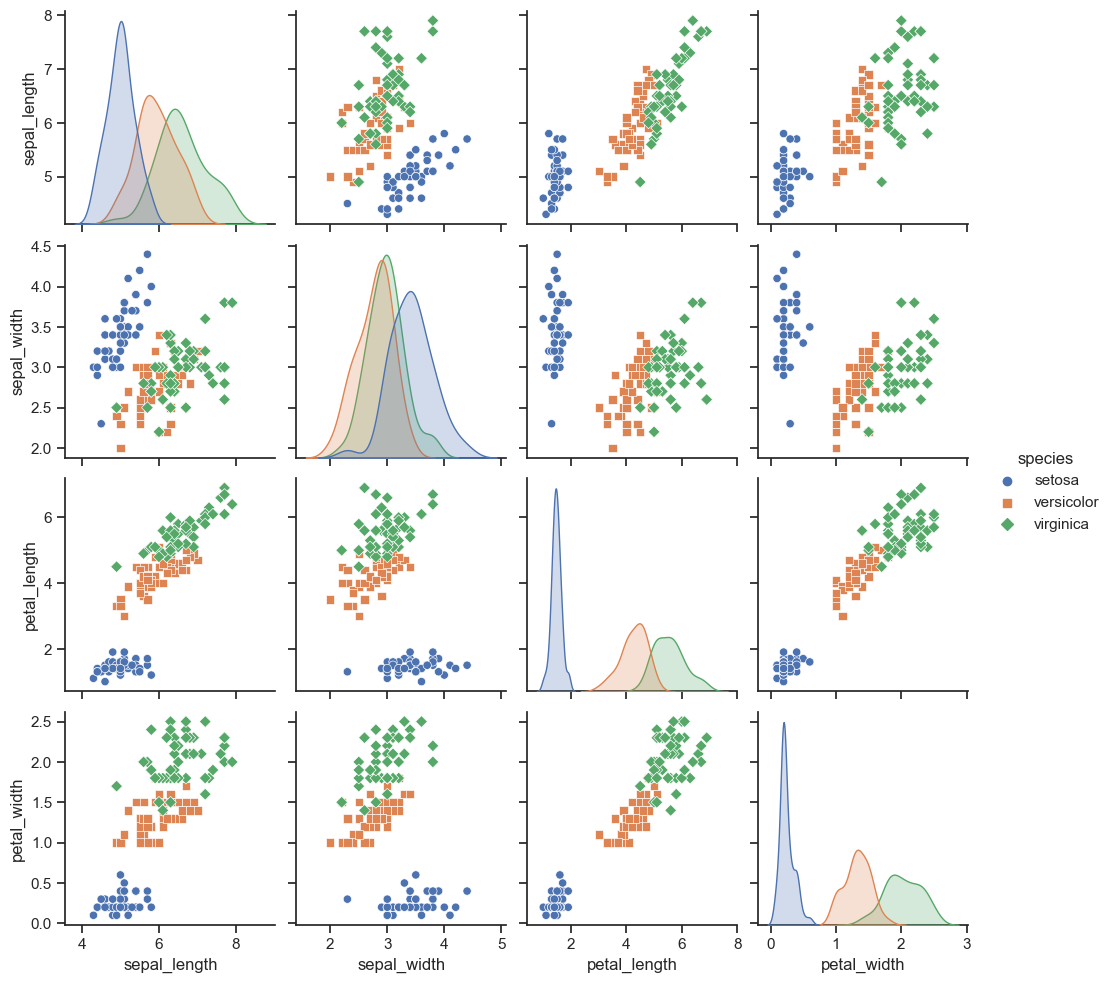

In [8]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris_df = sns.load_dataset("iris")
g = sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


In [10]:
#Scaling required for few algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 1. Decision Tree Classifier
dtree_model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
y_pred_dtree = dtree_model.predict(X_test)

# Report function definition
def Report(model, y_pred, X_train_used, X_test_used):
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('Train score: ', model.score(X_train_used, y_train))
    print('Test score: ', model.score(X_test_used, y_test))

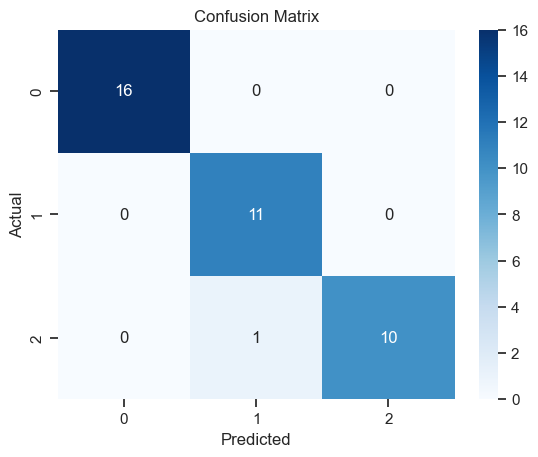

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train score:  0.9553571428571429
Test score:  0.9736842105263158


In [12]:
# 1.Descision Tree Classifier 
Report(dtree_model, y_pred_dtree, X_train, X_test)



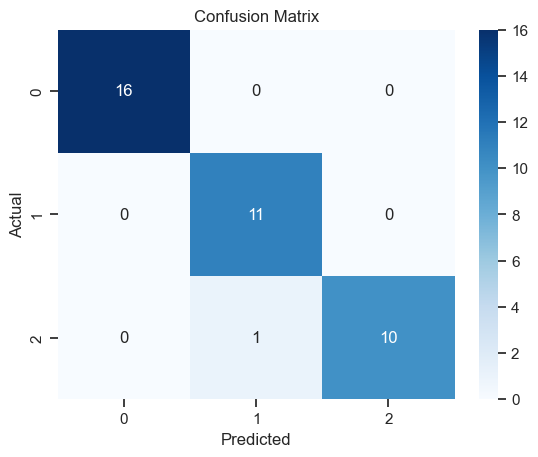

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train score:  0.9821428571428571
Test score:  0.9736842105263158


In [13]:
# 2.linear SVM classifier
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train_scaled, y_train)
y_pred_svm = svm_model_linear.predict(X_test_scaled)

Report(svm_model_linear, y_pred_svm, X_train_scaled, X_test_scaled)

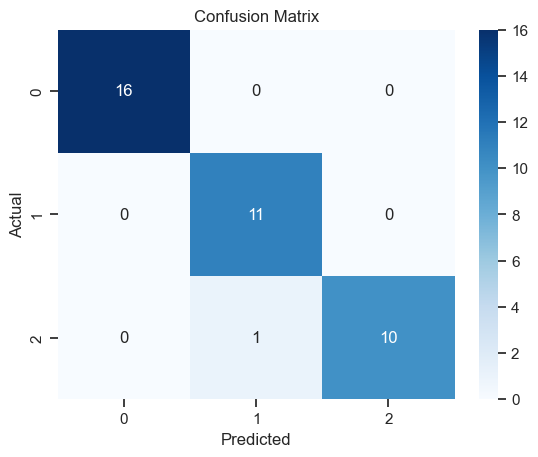

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Train score:  0.9553571428571429
Test score:  0.9736842105263158


In [14]:
# 3. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

Report(knn, y_pred_knn, X_train_scaled, X_test_scaled)

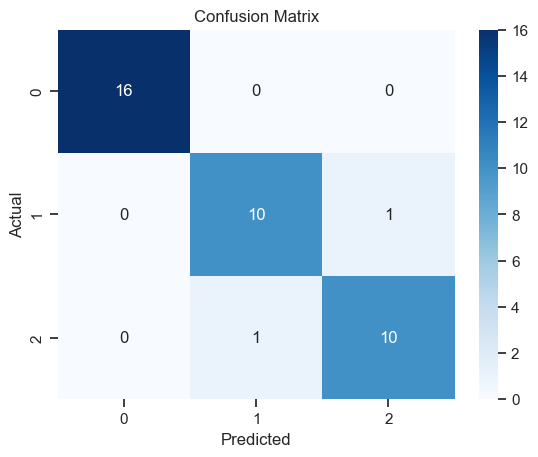

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Train score:  0.9642857142857143
Test score:  0.9473684210526315


In [15]:
# 4. Naive Bayes Classifier
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
Report(gnb, y_pred_gnb, X_train, X_test)